<a href="https://colab.research.google.com/github/evelynakim/DATA201/blob/main/Project2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Project: Examine Diabetes Treatment & Severity by Gender
**Background**
<br>Gender has been known to play a role in the level of care received from healthcare professionals. Research and journal has demonstrated the ways that women's concerns are often overlooked or not taken seriously  as compared to their male counterparts. I'd like to perform some exploratory data analysis to see if the data corroborates this experience.  

**Research Question**
<br>Does gender have any connection to the level of treatment or severity of diabetes patients in this dataset?  

**Dependent Variables**: Gender
* Female
* Male

**Goals**<br>Compare women and men as it relates to several indicators of level of treatment or severity of illness<br>**Look specifically at:** 

* readmission rate
* procedures 
* number of medications 
* inpatient vs outpatient procedures 
* emergencies 
* admission type 
* discharge disposition 
* time in hospital



In [1]:
#import necessary packages & data
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
df = pd.read_csv("https://raw.githubusercontent.com/niteen11/DataAnalyticsAcademy/master/Python/dataset_diabetes/diabetic_data.csv")

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [3]:
df.shape

(101766, 50)

In [4]:
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,?,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,?,?,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,?,?,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,?,?,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,?,?,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,?,?,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [5]:
df.tail()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
101761,443847548,100162476,AfricanAmerican,Male,[70-80),?,1,3,7,3,MC,?,51,0,16,0,0,0,250.13,291,458,9,None,>8,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Down,No,No,No,No,No,Ch,Yes,>30
101762,443847782,74694222,AfricanAmerican,Female,[80-90),?,1,4,5,5,MC,?,33,3,18,0,0,1,560,276,787,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Yes,NO
101763,443854148,41088789,Caucasian,Male,[70-80),?,1,1,7,1,MC,?,53,0,9,1,0,0,38,590,296,13,None,None,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Down,No,No,No,No,No,Ch,Yes,NO
101764,443857166,31693671,Caucasian,Female,[80-90),?,2,3,7,10,MC,Surgery-General,45,2,21,0,0,1,996,285,998,9,None,None,No,No,No,No,No,No,Steady,No,No,Steady,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
101765,443867222,175429310,Caucasian,Male,[70-80),?,1,1,7,6,?,?,13,3,3,0,0,0,530,530,787,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO


In [6]:
df.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

In [7]:
df.dtypes

encounter_id                 int64
patient_nbr                  int64
race                        object
gender                      object
age                         object
weight                      object
admission_type_id            int64
discharge_disposition_id     int64
admission_source_id          int64
time_in_hospital             int64
payer_code                  object
medical_specialty           object
num_lab_procedures           int64
num_procedures               int64
num_medications              int64
number_outpatient            int64
number_emergency             int64
number_inpatient             int64
diag_1                      object
diag_2                      object
diag_3                      object
number_diagnoses             int64
max_glu_serum               object
A1Cresult                   object
metformin                   object
repaglinide                 object
nateglinide                 object
chlorpropamide              object
glimepiride         

In [8]:
#checking if all patients were unique. demonstrates that at least one patient was admitted or documented more than once
df['patient_nbr'].is_unique

False

In [9]:
#can use as index
df['encounter_id'].is_unique

True

In [10]:
#begin examining columns of interest, starting with gender
df.groupby(['gender'])['encounter_id'].count()

gender
Female             54708
Male               47055
Unknown/Invalid        3
Name: encounter_id, dtype: int64

In [11]:
#create new dataframe to maintain integrity of original data, dropping rows with unknown/invalid genders
df1 = df[df['gender'] != 'Unknown/Invalid']

#test that drop was successful
df1.groupby(['gender'])['encounter_id'].count()

gender
Female    54708
Male      47055
Name: encounter_id, dtype: int64

In [12]:
#examine race breakdown
df1.groupby(['race'])['encounter_id'].count()

race
?                   2271
AfricanAmerican    19210
Asian                641
Caucasian          76099
Hispanic            2037
Other               1505
Name: encounter_id, dtype: int64

In [13]:
#look at different age groups 
print('age groups:',df1['age'].unique(),'\n')

#look at age breakdown/concentration
df1.groupby(['age'])['encounter_id'].count()

age groups: ['[0-10)' '[10-20)' '[20-30)' '[30-40)' '[40-50)' '[50-60)' '[60-70)'
 '[70-80)' '[80-90)' '[90-100)'] 



age
[0-10)        161
[10-20)       691
[20-30)      1657
[30-40)      3775
[40-50)      9685
[50-60)     17256
[60-70)     22482
[70-80)     26066
[80-90)     17197
[90-100)     2793
Name: encounter_id, dtype: int64

In [14]:
#rename age options because I dislike the formatting
#this line causes this error message: #A value is trying to be set on a copy of a slice from a DataFrame. Try using .loc[row_indexer,col_indexer] = value instead
df1['age'] = df['age'].replace({'[0-10)' : '0-9', '[10-20)' : '10-19', '[20-30)' : '20-29', '[30-40)' : '30-39', '[40-50)' : '40-49', '[50-60)' : '50-59', '[60-70)' : '60-69', '[70-80)' : '70-79', '[80-90)' : '80-89', '[90-100)' : '90-99'})

#I tried using the .loc function below and received this error instead: TypeError: 'DataFrame' object is not callable
#df1.loc[:,('age')] = df1.loc[:, df('age')].replace({'[0-10)' : '0-9', '[10-20)' : '10-19', '[20-30)' : '20-29', '[30-40)' : '30-39', '[40-50)' : '40-49', '[50-60)' : '50-59', '[60-70)' : '60-69', '[70-80)' : '70-79', '[80-90)' : '80-89', '[90-100)' : '90-99'})

#test renaming
df1['age'].unique()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


array(['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69',
       '70-79', '80-89', '90-99'], dtype=object)

In [15]:
#pulling unique values for medical specialties. we see the missing value '?'
print('unique medical specialties:',df1['medical_specialty'].unique(),'\n')

#look at medical specialty breakdown to see if it's worth keeping the data
#increase maximum rows
pd.set_option('display.max_rows', 500)
df1.groupby(['medical_specialty'])['encounter_id'].count()

unique medical specialties: ['Pediatrics-Endocrinology' '?' 'InternalMedicine'
 'Family/GeneralPractice' 'Cardiology' 'Surgery-General' 'Orthopedics'
 'Gastroenterology' 'Surgery-Cardiovascular/Thoracic' 'Nephrology'
 'Orthopedics-Reconstructive' 'Psychiatry' 'Emergency/Trauma'
 'Pulmonology' 'Surgery-Neuro' 'Obsterics&Gynecology-GynecologicOnco'
 'ObstetricsandGynecology' 'Pediatrics' 'Hematology/Oncology'
 'Otolaryngology' 'Surgery-Colon&Rectal' 'Pediatrics-CriticalCare'
 'Endocrinology' 'Urology' 'Psychiatry-Child/Adolescent'
 'Pediatrics-Pulmonology' 'Neurology' 'Anesthesiology-Pediatric'
 'Radiology' 'Pediatrics-Hematology-Oncology' 'Psychology' 'Podiatry'
 'Gynecology' 'Oncology' 'Pediatrics-Neurology' 'Surgery-Plastic'
 'Surgery-Thoracic' 'Surgery-PlasticwithinHeadandNeck' 'Ophthalmology'
 'Surgery-Pediatric' 'Pediatrics-EmergencyMedicine'
 'PhysicalMedicineandRehabilitation' 'InfectiousDiseases' 'Anesthesiology'
 'Rheumatology' 'AllergyandImmunology' 'Surgery-Maxillofacial'
 'P

medical_specialty
?                                       49947
AllergyandImmunology                        7
Anesthesiology                             12
Anesthesiology-Pediatric                   19
Cardiology                               5351
Cardiology-Pediatric                        7
DCPTEAM                                     6
Dentistry                                   4
Dermatology                                 1
Emergency/Trauma                         7565
Endocrinology                             120
Endocrinology-Metabolism                    8
Family/GeneralPractice                   7440
Gastroenterology                          564
Gynecology                                 58
Hematology                                 82
Hematology/Oncology                       207
Hospitalist                                57
InfectiousDiseases                         37
InternalMedicine                        14635
Nephrology                               1613
Neurology       

In [19]:
##DATA CLEANING##
#reformat row values: ? to None
df1.loc[:, 'medical_specialty'] = df1.loc[:, 'medical_specialty'].replace({'?': None}) #not sure how to fix this warning message. they suggested using .loc[row,col], which I already did

#test renaming
df1['medical_specialty'].unique()

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


array(['Pediatrics-Endocrinology', None, 'InternalMedicine',
       'Family/GeneralPractice', 'Cardiology', 'Surgery-General',
       'Orthopedics', 'Gastroenterology',
       'Surgery-Cardiovascular/Thoracic', 'Nephrology',
       'Orthopedics-Reconstructive', 'Psychiatry', 'Emergency/Trauma',
       'Pulmonology', 'Surgery-Neuro',
       'Obsterics&Gynecology-GynecologicOnco', 'ObstetricsandGynecology',
       'Pediatrics', 'Hematology/Oncology', 'Otolaryngology',
       'Surgery-Colon&Rectal', 'Pediatrics-CriticalCare', 'Endocrinology',
       'Urology', 'Psychiatry-Child/Adolescent', 'Pediatrics-Pulmonology',
       'Neurology', 'Anesthesiology-Pediatric', 'Radiology',
       'Pediatrics-Hematology-Oncology', 'Psychology', 'Podiatry',
       'Gynecology', 'Oncology', 'Pediatrics-Neurology',
       'Surgery-Plastic', 'Surgery-Thoracic',
       'Surgery-PlasticwithinHeadandNeck', 'Ophthalmology',
       'Surgery-Pediatric', 'Pediatrics-EmergencyMedicine',
       'PhysicalMedicineandR

In [20]:
#now looking at weight, we see there is another missing value marker
print('unique weights:',df1['weight'].unique(),'\n')

#examining weight, we see that a significant portion of entries are missing data. will drop this column.
df1.groupby(['weight'])['encounter_id'].count()

unique weights: ['?' '[75-100)' '[50-75)' '[0-25)' '[100-125)' '[25-50)' '[125-150)'
 '[175-200)' '[150-175)' '>200'] 



weight
>200             3
?            98566
[0-25)          48
[100-125)      625
[125-150)      145
[150-175)       35
[175-200)       11
[25-50)         97
[50-75)        897
[75-100)      1336
Name: encounter_id, dtype: int64

In [21]:
#examining time spent in hospital per encounter (time between admission and discharge, in days)
df1['time_in_hospital'].unique()

array([ 1,  3,  2,  4,  5, 13, 12,  9,  7, 10,  6, 11,  8, 14])

In [22]:
#examining number of lab procedures (# lab tests performed)
df1['num_lab_procedures'].unique()

array([ 41,  59,  11,  44,  51,  31,  70,  73,  68,  33,  47,  62,  60,
        55,  49,  75,  45,  29,  35,  42,  66,  36,  19,  64,  25,  53,
        52,  87,  27,  37,  46,  28,  48,  72,  10,   2,  65,  67,  40,
        54,  58,  57,  43,  32,  83,  34,  39,  69,  38,  56,  22,  96,
        78,  61,  88,  50,   1,  18,  82,   9,  63,  24,  71,  77,  81,
        76,  90,  93,   3, 103,  13,  80,  85,  16,  15,  12,  30,  23,
        17,  21,  79,  26,   5,  95,  97,  84,  14,  74, 105,  86,  98,
        20,   6,  94,   8, 102, 100,   7,  89,  91,  92,   4, 101,  99,
       114, 113, 111, 129, 107, 108, 106, 104, 109, 120, 132, 121, 126,
       118])

In [23]:
#examining number of procedures (# procedures performed, excluding lab tests)
print('unique procedures:',df1['num_procedures'].unique(),'\n')

#looking into the concentration breakdown for procedures
df1.groupby(['num_procedures'])['encounter_id'].count()

unique procedures: [0 5 1 6 2 3 4] 



num_procedures
0    46652
1    20741
2    12716
3     9443
4     4180
5     3077
6     4954
Name: encounter_id, dtype: int64

In [24]:
#examining number of medications (# distinct generic medications performed during encounter)
df1['num_medications'].unique()

array([ 1, 18, 13, 16,  8, 21, 12, 28, 17, 11, 15, 31,  2, 23, 19,  7, 20,
       14, 10, 22,  9, 27, 25,  4, 32,  6, 30, 26, 24, 33,  5, 39,  3, 29,
       61, 40, 46, 41, 36, 34, 35, 50, 43, 42, 37, 51, 38, 45, 54, 52, 49,
       62, 55, 47, 44, 53, 48, 57, 59, 56, 60, 63, 58, 70, 67, 64, 69, 65,
       68, 66, 81, 79, 75, 72, 74])

In [25]:
#examining number of outpatient visits (number of outpatient visits in the ear preceding the encounter)
df1['number_outpatient'].unique()

array([ 0,  2,  1,  5,  7,  9,  3,  8,  4, 12, 11,  6, 20, 15, 10, 13, 14,
       16, 21, 35, 17, 29, 36, 18, 19, 27, 22, 24, 42, 39, 34, 26, 33, 25,
       23, 28, 37, 38, 40])

In [26]:
#examining number of inpatient visits (# of inpatient visits in the ear preceding the encounter)
df1['number_inpatient'].unique()

array([ 0,  1,  2,  3,  6,  5,  4,  7,  8,  9, 15, 10, 11, 14, 12, 13, 17,
       16, 21, 18, 19])

In [27]:
##examining number of emergency visits (# of emergency visits the patient has had in the year preceding the encounter)
df1['number_emergency'].unique()

array([ 0,  1,  2,  4,  3,  9,  5,  7,  6,  8, 22, 25, 10, 13, 42, 16, 11,
       28, 15, 14, 18, 12, 21, 20, 19, 46, 76, 37, 64, 63, 54, 24, 29])

In [28]:
#examining glucose serum test results (indicates the range of the result or if the test was not taken)
print('Glucose Serum Results:',df1['max_glu_serum'].unique(),'\n')

#looking into the concentration breakdown for
df1.groupby(['max_glu_serum'])['encounter_id'].count()

Glucose Serum Results: ['None' '>300' 'Norm' '>200'] 



max_glu_serum
>200     1485
>300     1264
None    96417
Norm     2597
Name: encounter_id, dtype: int64

In [29]:
#examining A1c test results (indicates the range of the result or if the test was not taken)
print('A1C Result:',df1['A1Cresult'].unique(),'\n')

#looking into the concentration breakdown for
df1.groupby(['A1Cresult'])['encounter_id'].count()

A1C Result: ['None' '>7' '>8' 'Norm'] 



A1Cresult
>7       3812
>8       8216
None    84745
Norm     4990
Name: encounter_id, dtype: int64

In [30]:
#examining change in medications (whether medication dosage or type was changed)
print('Change in Medications:',df1['change'].unique(),'\n')

#looking into the concentration breakdown for medication changes
df1.groupby(['change'])['encounter_id'].count()

Change in Medications: ['No' 'Ch'] 



change
Ch    47009
No    54754
Name: encounter_id, dtype: int64

In [31]:
df1['change'].unique()

array(['No', 'Ch'], dtype=object)

In [32]:
#examining readmisssion data (days since inpatient readmission: <30 if patient was readmitted in less than 30 days, >30 if readmitted in more than. 30days, and no for no record of readmission)
print('Readmission:',df1['readmitted'].unique(),'\n')

#looking into the concentration breakdown for readmission
df1.groupby(['readmitted'])['encounter_id'].count()

##DATA CLEANING##
#reformat row values
#'NO' in readmitted column to title case
df1.loc[:, 'readmitted'] = df1.loc[:,'readmitted'].replace({'NO' : 'No'})

Readmission: ['NO' '>30' '<30'] 



/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


In [33]:
#examining prescription of diabetes medication (yes if diabetic medication prescribed, no if not)
print('Diabetes Medication Prescribed:',df1['diabetesMed'].unique(),'\n')

#looking into the concentration breakdown for
df1.groupby(['diabetesMed'])['encounter_id'].count()

Diabetes Medication Prescribed: ['No' 'Yes'] 



diabetesMed
No     23402
Yes    78361
Name: encounter_id, dtype: int64

In [34]:
#examining admission types & concentration
#while this looks like rich data, we don't have information about what these codes mean, so will drop
print(':',df1['admission_type_id'].unique(),'\n')
df1.groupby(['admission_type_id'])['encounter_id'].count()

: [6 1 2 3 4 5 8 7] 



admission_type_id
1    53988
2    18480
3    18868
4       10
5     4785
6     5291
7       21
8      320
Name: encounter_id, dtype: int64

In [35]:
#examining discharge disposition information & concentration
#while this looks like rich data, we don't have information about what these codes mean, so will drop
print(':',df1['discharge_disposition_id'].unique(),'\n')
df1.groupby(['discharge_disposition_id'])['encounter_id'].count()

: [25  1  3  6  2  5 11  7 10  4 14 18  8 13 12 16 17 22 23  9 20 15 24 28
 19 27] 



discharge_disposition_id
1     60232
2      2128
3     13954
4       815
5      1184
6     12902
7       623
8       108
9        21
10        6
11     1642
12        3
13      399
14      372
15       63
16       11
17       14
18     3691
19        8
20        2
22     1992
23      412
24       48
25      989
27        5
28      139
Name: encounter_id, dtype: int64

In [36]:
#examining admission source information & concentration
#while this looks like rich data, we don't have information about what these codes mean, so will drop
print(':',df1['admission_source_id'].unique(),'\n')
df1.groupby(['admission_source_id'])['encounter_id'].count()

: [ 1  7  2  4  5  6 20  3 17  8  9 14 10 22 11 25 13] 



admission_source_id
1     29564
2      1104
3       187
4      3187
5       855
6      2264
7     57492
8        16
9       125
10        8
11        2
13        1
14        2
17     6781
20      161
22       12
25        2
Name: encounter_id, dtype: int64

In [37]:
#reset maximum rows
pd.reset_option('display.max_rows')

In [38]:
#drop irrelevant columns to my analysis & columns with many missing values (weight)
df1 = df1.drop(['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton', 'insulin', 'glyburide-metformin', 'glipizide-metformin', 'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone', 'weight', 'payer_code', 'diag_1', 'diag_2', 'diag_3', 'number_diagnoses','admission_type_id', 'discharge_disposition_id', 'admission_source_id'], axis=1)

In [39]:
#look at dataframe after all the changes have been made
df1.head(10)

,encounter_id,patient_nbr,race,gender,age,time_in_hospital,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,max_glu_serum,A1Cresult,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,0-9,1,Pediatrics-Endocrinology,41,0,1,0,0,0,None,None,No,No,No
1,149190,55629189,Caucasian,Female,10-19,3,None,59,0,18,0,0,0,None,None,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,20-29,2,None,11,5,13,2,0,1,None,None,No,Yes,No
3,500364,82442376,Caucasian,Male,30-39,2,None,44,1,16,0,0,0,None,None,Ch,Yes,No
4,16680,42519267,Caucasian,Male,40-49,1,None,51,0,8,0,0,0,None,None,Ch,Yes,No
5,35754,82637451,Caucasian,Male,50-59,3,None,31,6,16,0,0,0,None,None,No,Yes,>30
6,55842,84259809,Caucasian,Male,60-69,4,None,70,1,21,0,0,0,None,None,Ch,Yes,No
7,63768,114882984,Caucasian,Male,70-79,5,None,73,0,12,0,0,0,None,None,No,Yes,>30
8,12522,48330783,Caucasian,Female,80-89,13,None,68,2,28,0,0,0,None,None,Ch,Yes,No
9,15738,63555939,Caucasian,Female,90-99,12,InternalMedicine,33,3,18,0,0,0,None,None,Ch,Yes,No


In [40]:
df1.tail(10)

,encounter_id,patient_nbr,race,gender,age,time_in_hospital,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,max_glu_serum,A1Cresult,change,diabetesMed,readmitted
101756,443842070,140199494,Other,Female,60-69,2,None,46,6,17,1,1,1,None,None,No,Yes,>30
101757,443842136,181593374,Caucasian,Female,70-79,5,None,21,1,16,0,0,1,None,None,No,Yes,No
101758,443842340,120975314,Caucasian,Female,80-89,5,None,76,1,22,0,1,0,None,None,Ch,Yes,No
101759,443842778,86472243,Caucasian,Male,80-89,1,None,1,0,15,3,0,0,None,None,Ch,Yes,No
101760,443847176,50375628,AfricanAmerican,Female,60-69,6,None,45,1,25,3,1,2,None,None,Ch,Yes,>30
101761,443847548,100162476,AfricanAmerican,Male,70-79,3,None,51,0,16,0,0,0,None,>8,Ch,Yes,>30
101762,443847782,74694222,AfricanAmerican,Female,80-89,5,None,33,3,18,0,0,1,None,None,No,Yes,No
101763,443854148,41088789,Caucasian,Male,70-79,1,None,53,0,9,1,0,0,None,None,Ch,Yes,No
101764,443857166,31693671,Caucasian,Female,80-89,10,Surgery-General,45,2,21,0,0,1,None,None,Ch,Yes,No
101765,443867222,175429310,Caucasian,Male,70-79,6,None,13,3,3,0,0,0,None,None,No,No,No


In [41]:
df1.drop(['race','encounter_id','patient_nbr'], axis=1).groupby(['age','gender']).mean()


time_in_hospital  ...  number_inpatient
age   gender                    ...                  
0-9   Female          2.662651  ...          0.084337
      Male            2.423077  ...          0.076923
10-19 Female          2.995025  ...          0.539801
      Male            3.463668  ...          0.522491
20-29 Female          3.556553  ...          1.596050
      Male            3.581952  ...          0.810313
30-39 Female          3.776133  ...          0.747456
      Male            3.831370  ...          0.783013
40-49 Female          4.084182  ...          0.782582
      Male            3.995691  ...          0.666393
50-59 Female          4.186421  ...          0.649207
      Male            4.065868  ...          0.581414
60-69 Female          4.474912  ...          0.621372
      Male            4.292794  ...          0.591454
70-79 Female          4.688809  ...          0.597283
      Male            4.477527  ...          0.625610
80-89 Female          4.879125  ...          0.607038
      Male            4.697695  ...          0.612391
90-99 Female          4.775836  ...          0.574139
      Male            4.705063  ...          0.518987

[20 rows x 7 columns]

In [42]:
df1.drop(['race','encounter_id','patient_nbr'], axis=1).groupby(['age','gender']).sum()

time_in_hospital  ...  number_inpatient
age   gender                    ...                  
0-9   Female               221  ...                 7
      Male                 189  ...                 6
10-19 Female              1204  ...               217
      Male                1001  ...               151
20-29 Female              3962  ...              1778
      Male                1945  ...               440
30-39 Female              8164  ...              1616
      Male                6180  ...              1263
40-49 Female             19649  ...              3765
      Male               19475  ...              3248
50-59 Female             35886  ...              5565
      Male               35308  ...              5049
60-69 Female             49497  ...              6873
      Male               49028  ...              6755
70-79 Female             65573  ...              8353
      Male               54093  ...              7558
80-89 Female             51304  ...              6383
      Male               31390  ...              4092
90-99 Female              9566  ...              1150
      Male                3717  ...               410

[20 rows x 7 columns]

In [43]:
df1.drop(['race','encounter_id','patient_nbr'], axis=1).groupby(['age','gender']).count()

time_in_hospital  medical_specialty  ...  diabetesMed  readmitted
age   gender                                       ...                         
0-9   Female                83                 69  ...           83          83
      Male                  78                 64  ...           78          78
10-19 Female               402                276  ...          402         402
      Male                 289                187  ...          289         289
20-29 Female              1114                645  ...         1114        1114
      Male                 543                270  ...          543         543
30-39 Female              2162               1209  ...         2162        2162
      Male                1613                838  ...         1613        1613
40-49 Female              4811               2590  ...         4811        4811
      Male                4874               2627  ...         4874        4874
50-59 Female              8572               4448  ...         8572        8572
      Male                8684               4574  ...         8684        8684
60-69 Female             11061               5578  ...        11061       11061
      Male               11421               5784  ...        11421       11421
70-79 Female             13985               7104  ...        13985       13985
      Male               12081               5993  ...        12081       12081
80-89 Female             10515               5111  ...        10515       10515
      Male                6682               3091  ...         6682        6682
90-99 Female              2003                993  ...         2003        2003
      Male                 790                365  ...          790         790

[20 rows x 13 columns]

In [44]:
#pull column names
df1.columns

#rename columns for visualizations
df2 = df1.rename(columns={'encounter_id': 'Encounter ID', 'patient_nbr': 'Patient Number', 'race': 'Race', 'gender': 'Gender', 'age': 'Age',
       'time_in_hospital': 'Days in Hospital', 'medical_specialty': 'Admitting Physician Specialty', 'num_lab_procedures': 'Lab Tests',
       'num_procedures': 'Non-Lab Procedures', 'num_medications': 'Medications Administered', 'number_outpatient': 'Outpatient Visits',
       'number_emergency': 'Emergency Visits', 'number_inpatient': 'Inpatient Visits', 'max_glu_serum': 'Glucose Serum Results', 'A1Cresult': 'A1C Results',
       'change': 'Medication Change', 'diabetesMed': 'Diabetes Medication Prescribed', 'readmitted':'Readmitted'})
#test renaming
df2.columns

Index(['Encounter ID', 'Patient Number', 'Race', 'Gender', 'Age',
       'Days in Hospital', 'Admitting Physician Specialty', 'Lab Tests',
       'Non-Lab Procedures', 'Medications Administered', 'Outpatient Visits',
       'Emergency Visits', 'Inpatient Visits', 'Glucose Serum Results',
       'A1C Results', 'Medication Change', 'Diabetes Medication Prescribed',
       'Readmitted'],
      dtype='object')

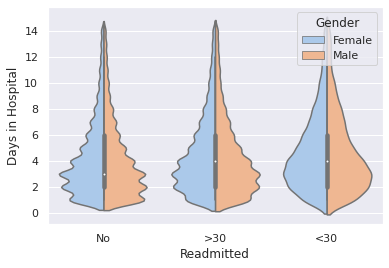

In [45]:
sns.set_theme(palette='pastel')
sns.violinplot(data=df2, x='Readmitted', y='Days in Hospital', hue='Gender', split=True)
#sns.despine(left=True)

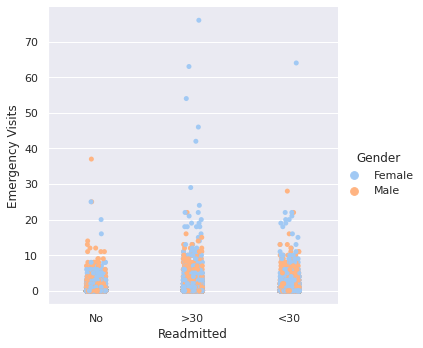

In [46]:
sns.catplot(data=df2, x='Readmitted', y='Emergency Visits', hue='Gender')

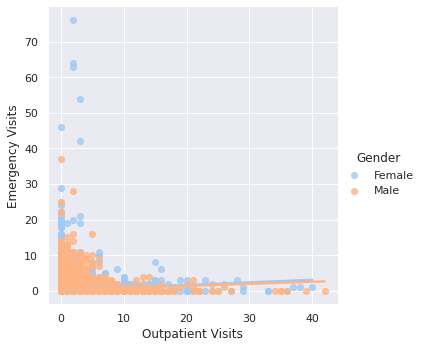

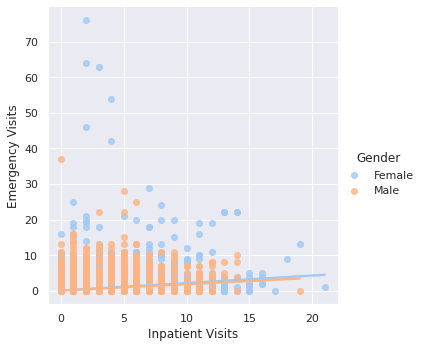

In [47]:
sns.lmplot(data=df2, x='Outpatient Visits', y='Emergency Visits', hue='Gender')
sns.lmplot(data=df2, x='Inpatient Visits', y='Emergency Visits', hue='Gender')

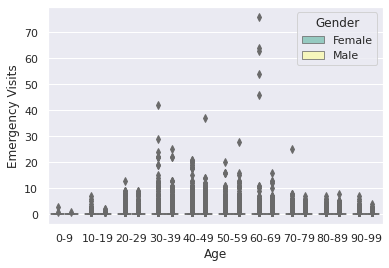

In [48]:
sns.boxplot(data=df2, x='Age', y='Emergency Visits', hue='Gender', palette='Set3')

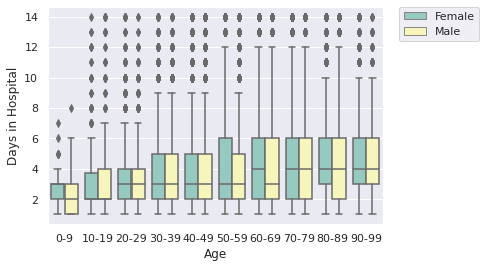

In [49]:
sns.boxplot(data=df2, x='Age', y='Days in Hospital', hue='Gender', palette='Set3')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

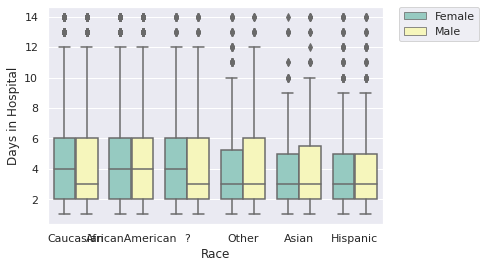

In [50]:
sns.boxplot(data=df2, x='Race', y='Days in Hospital', hue='Gender', palette='Set3')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

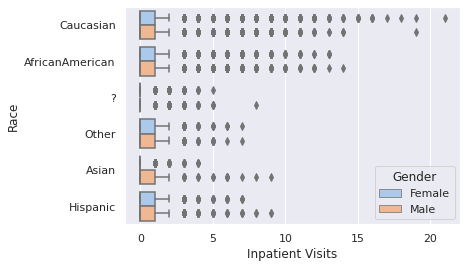

In [51]:
sns.boxplot(data=df2, y='Race', x='Inpatient Visits', hue='Gender')

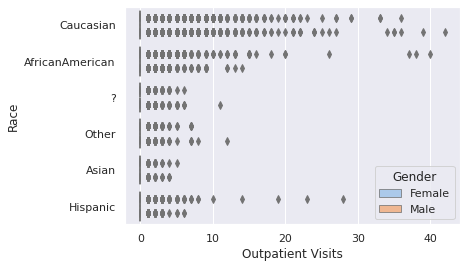

In [52]:
sns.boxplot(data=df2, y='Race', x='Outpatient Visits', hue='Gender')
#,showfliers=False

#Discussion
I had some trouble examining this data due to there being several outliers making the data difficult to read in the various visualizations I created. I was unwilling to drop the outliers because they were still relevant data and their removal may have impacted the overall analyses. I was also trying to use seaborn to gain more experience using it. Given more time, I would examine this data with more familiar tools (not seaborn).